#                              Python For Data Science

                                    
#                                                 By: Chirag Dhankani

#### Date: 12/08/2020

# Importing Libraries

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

### Importing the required Data frame

In [27]:
df = pd.read_csv("Covid Data WHO.csv", parse_dates=["Date_reported"])          ###The Data was taken from the official 
df.columns = df.columns.str.strip()                                            ### website Of "WHO" On Date: 11Th August 2020
print(df.shape)
df.head()

(34037, 8)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


# Objectives:
# - Studying the Data of Sars Cov-2 of Several Countries
# - Identifying Best and Worst performing Countries 
# - Forecasting India's Total No. of Cases in next week

## Some Data Cleaning

In [4]:
Covid = df[[ 'Date_reported','Country','Cumulative_cases']].copy()
Covid = Covid.rename(columns={'Date_reported':'Date'})
Covid = Covid.rename(columns={'Cumulative_cases':'Cases'})
Covid.head()

,Date,Country,Cases
0,2020-02-24,Afghanistan,5
1,2020-02-25,Afghanistan,5
2,2020-02-26,Afghanistan,5
3,2020-02-27,Afghanistan,5
4,2020-02-28,Afghanistan,5


### Q. Now let's see how many Days of Data do we have

In [5]:
Days =Covid['Date'].unique().tolist()
len(Days)

220

### Q. What's The Range of the Days

In [6]:
print('Date Format-(YYYY/MM/DD)')
print(Covid['Date'].iloc[0])
print("to")
print(Covid['Date'].iloc[-1])

Date Format-(YYYY/MM/DD)
2020-02-24 00:00:00
to
2020-08-10 00:00:00


### Q. Identifying and Plotting top 5 worst hit countries as of 10th August 2020

In [7]:
Top5 = Covid.set_index('Date')
Top5 = Top5.loc['2020-08-10']
Top5 = Top5.sort_values(['Cases'], ascending=[0])
Top5.head()

,Country,Cases
Date,,
2020-08-10,United States of America,4951851
2020-08-10,Brazil,3012412
2020-08-10,India,2215074
2020-08-10,Russian Federation,892654
2020-08-10,South Africa,559859


#### let's plot these 5 countries and se graphically rise in number of cases on monthly bases

Step1: Creating a Pivot table 

In [64]:
Covid1= pd.pivot_table(Covid, index='Date',columns='Country', values='Cases')
Covid1.tail()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,"occupied Palestinian territory, including east Jerusalem"
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-06,36896.0,5889.0,33055.0,939.0,1395.0,3.0,92.0,213535.0,39819.0,132.0,...,481.0,4728239.0,1300.0,28069.0,21438.0,717.0,1767.0,7022.0,4339.0,16981.0
2020-08-07,36937.0,6016.0,33626.0,945.0,1483.0,3.0,92.0,220682.0,39885.0,171.0,...,501.0,4781612.0,1309.0,28809.0,22299.0,750.0,1767.0,7164.0,4395.0,17434.0
2020-08-08,37015.0,6151.0,34155.0,956.0,1538.0,3.0,92.0,228195.0,40185.0,263.0,...,522.0,4836930.0,1318.0,29459.0,23280.0,789.0,1800.0,7164.0,4451.0,17948.0
2020-08-09,37054.0,6275.0,34693.0,956.0,1572.0,3.0,92.0,235677.0,40410.0,263.0,...,528.0,4897958.0,1325.0,30197.0,24166.0,812.0,1801.0,7903.0,4575.0,18374.0
2020-08-10,37054.0,6411.0,35214.0,956.0,1672.0,3.0,92.0,241811.0,40433.0,263.0,...,528.0,4951851.0,1335.0,30820.0,24961.0,841.0,1808.0,8085.0,4649.0,18651.0


step2: Plotting

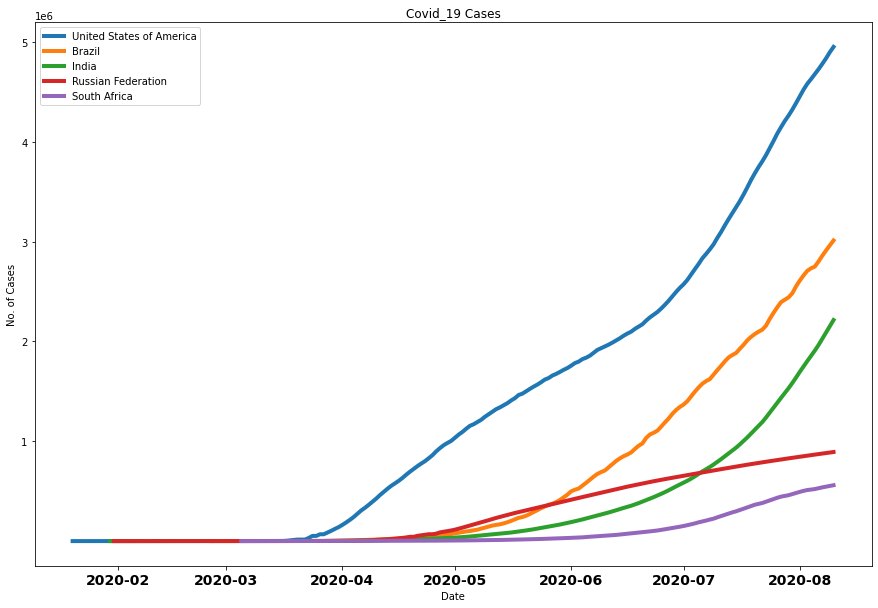

In [9]:
plt.figure(figsize=(15,10))
plt.title('Covid_19 Cases')

plt.plot(Covid1["United States of America"], linewidth= 4.0)
plt.plot(Covid1.Brazil, linewidth= 4.0)
plt.plot(Covid1.India, linewidth= 4.0)
plt.plot(Covid1['Russian Federation'], linewidth= 4.0)
plt.plot(Covid1['South Africa'], linewidth= 4.0)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks([1000000,2000000,3000000,4000000,5000000])

plt.xlabel('Date')
plt.ylabel('No. of Cases')

plt.legend(['United States of America','Brazil','India','Russian Federation','South Africa'])

plt.show()

# Q. Now we'll measure performace of countries in managing the pandemic,we'll see Best and worst 5 performing countries

For that we'll calculate percentage of Deaths to the Confirmed cases of Countries for this


we'll take Data of the latest Date we have for this.

In [53]:
Covid = df[[ 'Date_reported','Country','Cumulative_cases','Cumulative_deaths']].copy()
Covid = Covid.rename(columns={'Date_reported':'Date'})
Covid = Covid.rename(columns={'Cumulative_cases':'Cases'})
Covid = Covid.rename(columns={'Cumulative_deaths':'deaths'})
Covid.head()

,Date,Country,Cases,deaths
0,2020-02-24,Afghanistan,5,0
1,2020-02-25,Afghanistan,5,0
2,2020-02-26,Afghanistan,5,0
3,2020-02-27,Afghanistan,5,0
4,2020-02-28,Afghanistan,5,0


In [62]:
affected_min = Covid[Covid.Cases>1000]                     ###Only taking Countries with minimun=1000 infected

In [55]:
affected = affected_min.set_index('Date')
affected = affected.loc['2020-08-10']
affected.head()

,Country,Cases,deaths
Date,,,
2020-08-10,Afghanistan,37054,1312
2020-08-10,Albania,6411,199
2020-08-10,Algeria,35214,1302
2020-08-10,Angola,1672,75
2020-08-10,Argentina,241811,4556


### Top5 worst performing Countries


In [56]:
affected['percentage']= affected['deaths']/affected['Cases'] * 100
affected = affected.sort_values(['percentage'], ascending=[0])
affected.head()

,Country,Cases,deaths,percentage
Date,,,,
2020-08-10,Yemen,1808,516,28.539823
2020-08-10,France,185353,30201,16.293775
2020-08-10,The United Kingdom,310829,46574,14.983801
2020-08-10,Italy,250566,35205,14.050190
2020-08-10,Belgium,74059,9872,13.329913


### Top5 best performing Countries 

In [57]:
affected.tail()

,Country,Cases,deaths,percentage
Date,,,,
2020-08-10,Bahrain,44011,162,0.368090
2020-08-10,Rwanda,2140,7,0.327103
2020-08-10,Nepal,22972,75,0.326484
2020-08-10,Qatar,112947,184,0.162908
2020-08-10,Singapore,55104,27,0.048998


### Let's check India's performance 

In [58]:
affected[affected.values == 'India']    ### You can check the performance of any country by replacing it with India

,Country,Cases,deaths,percentage
Date,,,,
2020-08-10,India,2215074,44386,2.003816


# Q. Now let's forecast what will be the total Number of Cases in India in next seven days with the help of FBProphet Module

In [59]:
from fbprophet import Prophet         ####importing fbprophet library developed by facebook

In [60]:
Covid_In = Covid1['India'].copy()
Covid_In.tail()

Date
2020-08-06    1964536.0
2020-08-07    2027074.0
2020-08-08    2088611.0
2020-08-09    2153010.0
2020-08-10    2215074.0
Name: India, dtype: float64

In [61]:
Covid_In=pd.DataFrame(Covid_In)

In [33]:
Covid_In = Covid_In.reset_index() 
Covid_In.tail()

,Date,India
215,2020-08-06,1964536.0
216,2020-08-07,2027074.0
217,2020-08-08,2088611.0
218,2020-08-09,2153010.0
219,2020-08-10,2215074.0


In [34]:
Covid_In['Date']=pd.to_datetime(Covid_In['Date'])            ### Converrting into a Date time format

In [38]:
Covid_In.columns =['ds','y']                                ### Renaming the column names in the format 
Covid_In['ds'] = pd.to_datetime(Covid_In['ds'])             ### required by FBprophet library 

In [36]:
Covid_In.tail()

,ds,y
215,2020-08-06,1964536.0
216,2020-08-07,2027074.0
217,2020-08-08,2088611.0
218,2020-08-09,2153010.0
219,2020-08-10,2215074.0


Initializing the modal

In [50]:
m = Prophet(interval_width=1.0)                            ## Width is the Accuracy we can set
m.fit(Covid_In)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
222,2020-08-13
223,2020-08-14
224,2020-08-15
225,2020-08-16
226,2020-08-17


#### Prediction

In [51]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
222,2020-08-13,2.156391e+06,2.031516e+06,2.256337e+06
223,2020-08-14,2.196407e+06,2.081745e+06,2.319731e+06
224,2020-08-15,2.236633e+06,2.110291e+06,2.364295e+06
225,2020-08-16,2.277311e+06,2.171544e+06,2.397102e+06
226,2020-08-17,2.317843e+06,2.197560e+06,2.427710e+06


here,    In Millions

     yhat= predicted cases 
     yhat_lower= Lower limit of Cases
     yhat_upper= upper limit of Cases

#### Plotting the Prediction

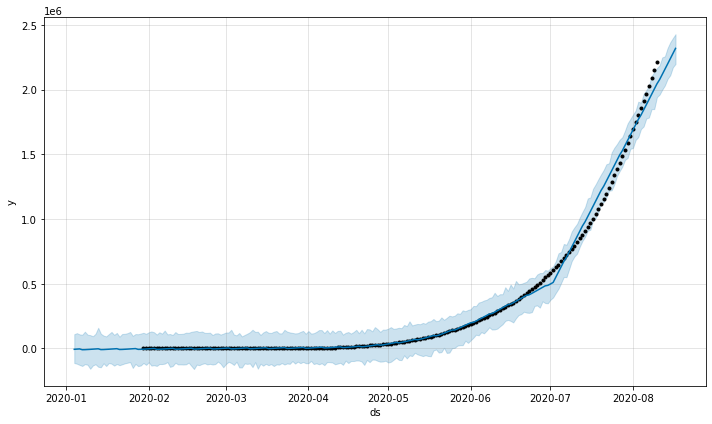

In [63]:
figure = m.plot(forecast)

### Now here,
##### 'BLACK DOTS'= Actual Number of cases on that date
##### 'BLUE LINE' = Prediction of cases According to Trend
#####  'BLUE SHADED REGION' = lower and Upper limits of the cases